## Setup

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load the data

We will start first by working with world population data for the year 2020. 

In [2]:
# Path of the file to read.
filepath = '/kaggle/input/population-by-country-2020/population_by_country_2020.csv'

# Read the file into a data variable.
data = pd.read_csv(filepath, index_col='Country (or dependency)')

data.head()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,
China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


## Visualize the data

We can notice from the chart below that China and India have by far the largest populations. Notice the vast change in the bar length as we go from India (second largest) to the United States (third largest).

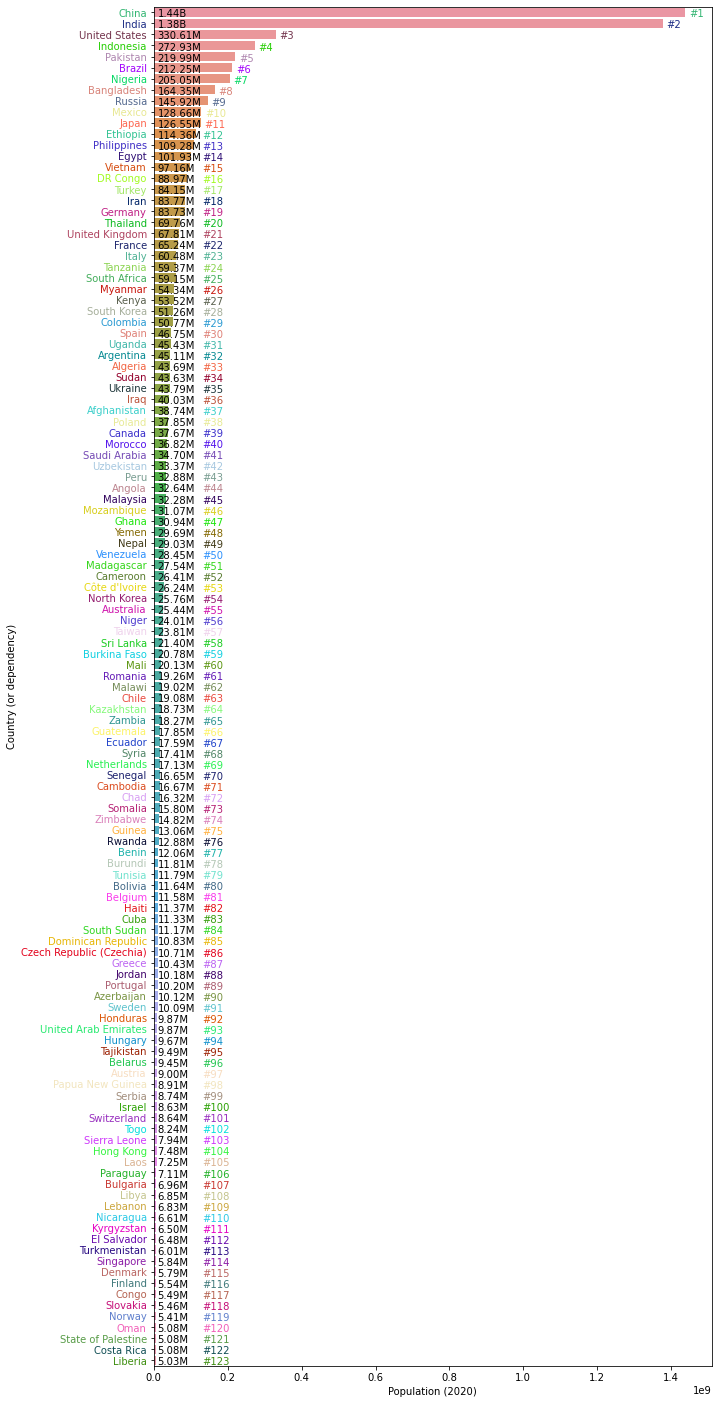

In [3]:
# Create a bar chart of population by country.

# Use partial data only, since the entire dataset is too big to fit into one chart.
# Limit only to countries whose population is > 5 million.
partial_data = data.loc[data['Population (2020)'] > 5e6]

# Create plot.
plt.subplots(figsize=(10,25))
ax = sns.barplot(x=partial_data['Population (2020)'], y=partial_data.index)

# Show population values on each bar, along with rank number for each country.
r = 1   # rank number
c = np.random.rand(3, len(partial_data))  # random color list for y-ticks and ranks

for p in ax.patches:
    _x = p.get_x() + 1e7
    _y = p.get_y() + p.get_height() - 0.25
    value = int(p.get_width())
    if (value >= 1e9):
        value = '{:.2f}'.format(value/1e9) + 'B'
    else:
        value = '{:.2f}'.format(value/1e6) + 'M'
    ax.text(_x, _y, value, ha='left', va='center', color='black')
    if (p.get_width() >= 115e6):
        ax.text(_x + p.get_width(), _y, '#' + str(r), ha='left', va='center', color=c[:,r-1])
    else:
        ax.text(_x + 120e6, _y, '#' + str(r), ha='left', va='center', color=c[:,r-1])
    ax.get_yticklabels()[r-1].set_color(c[:,r-1])
    r += 1

## Time evolution of world population

It is interesting to see how the world population has evolved over time. We expect it to have increased for sure, but has this increase slowed down or sped-up during the past few years? Is it expected that the increase in world population to continue increasing indefinitely? 

To answer some or all of these questions, we are going to use a dataset that has been downloaded from [Gapminder](http://gapm.io/dpop). The data covers the years 1800-2100, where the data forecasts were obtained from UN datasets (see Gapminder link for more details on this dataset).

In [4]:
# Path of the file to read.
filepath_2 = '/kaggle/input/world-population-time/population_total.csv'

# Read the file into a data variable.
data_time = pd.read_csv(filepath_2, index_col='country', parse_dates=True)

data_time.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,2580000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


Let us first check if the bar chart for the year 2020 using this dataset matches what we obtained above.

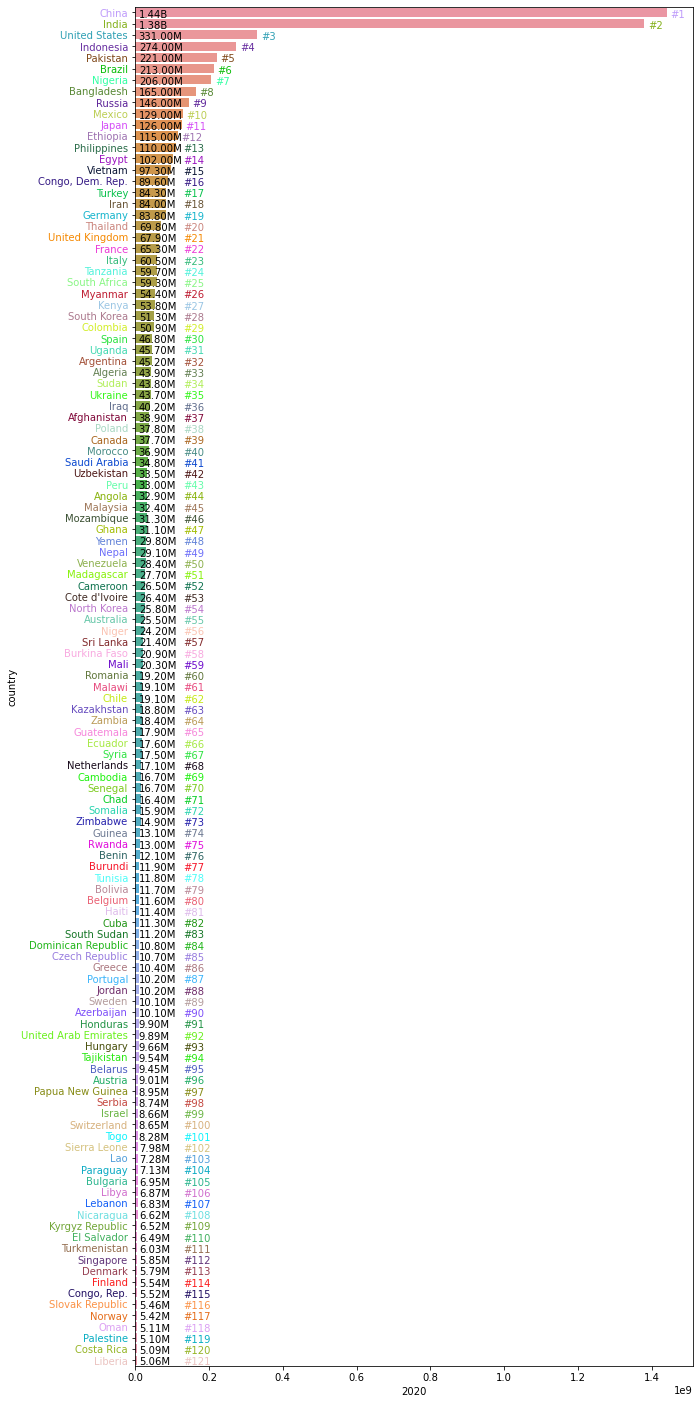

In [5]:
# Create a bar chart of population by country.

# Pick the year 2020 column only, and sort the values in descending order.
data_time_2020 = data_time['2020'].copy()
data_time_2020.sort_values(ascending=False, inplace=True)

# Use partial data only, since the entire dataset is too big to fit into one chart.
# Limit only to countries whose population is > 5 million.
partial_data_time_2020 = data_time_2020.loc[data_time_2020 > 5e6]

# Create plot.
plt.subplots(figsize=(10,25))
ax = sns.barplot(x=partial_data_time_2020, y=partial_data_time_2020.index)

# Show population values on each bar, along with rank number for each country.
r = 1   # rank number
c = np.random.rand(3, len(partial_data))  # random color list for y-ticks and ranks

for p in ax.patches:
    _x = p.get_x() + 1e7
    _y = p.get_y() + p.get_height() - 0.25
    value = int(p.get_width())
    if (value >= 1e9):
        value = '{:.2f}'.format(value/1e9) + 'B'
    else:
        value = '{:.2f}'.format(value/1e6) + 'M'
    ax.text(_x, _y, value, ha='left', va='center', color='black')
    if (p.get_width() >= 115e6):
        ax.text(_x + p.get_width(), _y, '#' + str(r), ha='left', va='center', color=c[:,r-1])
    else:
        ax.text(_x + 120e6, _y, '#' + str(r), ha='left', va='center', color=c[:,r-1])
    ax.get_yticklabels()[r-1].set_color(c[:,r-1])
    r += 1

Now, let's observe the time evolution of the populations for the top 5 countries. As can be seen in the plot below, the the total population in the top 5 countries will not increase indefinitely. In fact, the rate of increase has already started slowing down, and for most countries will taper off at some point.

(array([-2.50e+08,  0.00e+00,  2.50e+08,  5.00e+08,  7.50e+08,  1.00e+09,
         1.25e+09,  1.50e+09,  1.75e+09]),
 <a list of 9 Text major ticklabel objects>)

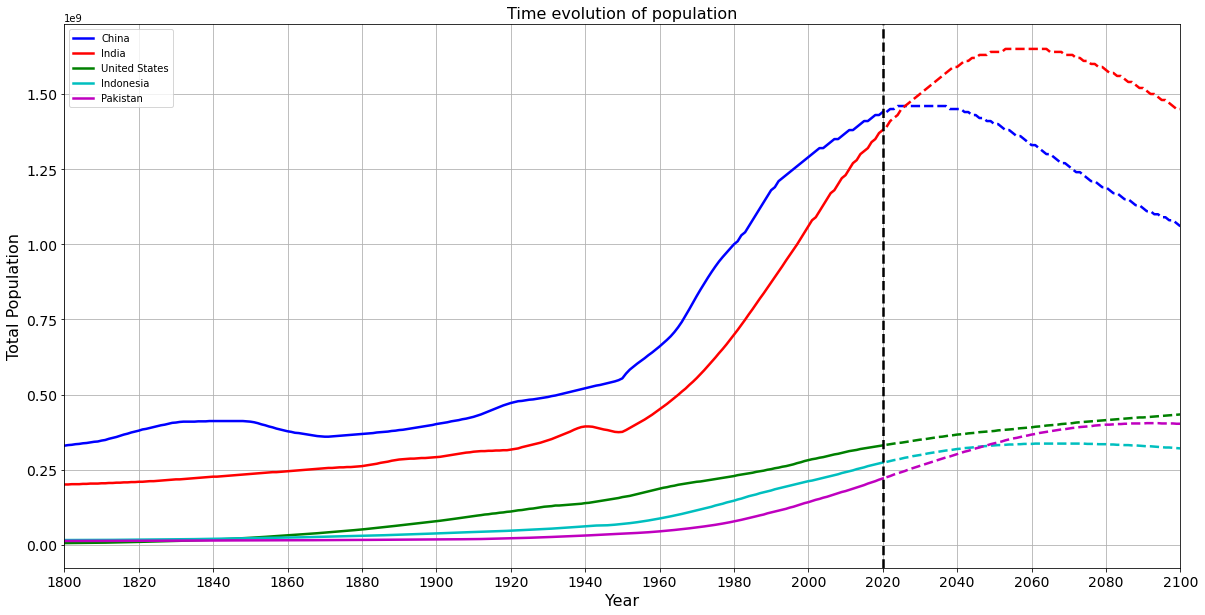

In [6]:
# Create line plots of population vs. year for the top 5 countries with the largest population sizes. 

fig, ax = plt.subplots(figsize=(20,10))
plt.grid(True)
plt.title('Time evolution of population', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Population', fontsize=16)

year = range(1800,2101)

# Plot past-present data in solid lines, and forecasted data in dashed lines.

plt.plot(year[:year.index(2020)+1], data_time.loc['China',:'2020'], 'b-', linewidth=2.5, label='China')
plt.plot(year[year.index(2020)+1::], data_time.loc['China','2021'::], 'b--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], data_time.loc['India',:'2020'], 'r-', linewidth=2.5, label='India')
plt.plot(year[year.index(2020)+1::], data_time.loc['India','2021'::], 'r--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], data_time.loc['United States',:'2020'], 'g-', linewidth=2.5, label='United States')
plt.plot(year[year.index(2020)+1::], data_time.loc['United States','2021'::], 'g--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], data_time.loc['Indonesia',:'2020'], 'c-', linewidth=2.5, label='Indonesia')
plt.plot(year[year.index(2020)+1::], data_time.loc['Indonesia','2021'::], 'c--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], data_time.loc['Pakistan',:'2020'], 'm-', linewidth=2.5, label='Pakistan')
plt.plot(year[year.index(2020)+1::], data_time.loc['Pakistan','2021'::], 'm--', linewidth=2.5)
plt.axvline(x=2020, color='k', linestyle='--', linewidth=2.5)

plt.xlim(min(year),max(year))
ax.set_xticks(range(min(year),max(year)+1, 20))
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

What is the cause of this slow-down? Let's start by looking at fertility rate during that same period. Could the slow-down of population growth be attributed to a decrease in fertility rate?

The fertility dataset was again obtained from [Gapminder](https://www.gapminder.org/data/documentation/gd008/).
As can be seen in the plot below, the fertility rate has been either constant or decreasing. This cannot explain the increase in the population, because a decrease in fertility rate would intuitively mean that the population should decrease. This cannot be the whole story. However, the convergence of fertility rates to about 2 babies per woman could explain the slow-down in the rate of increase in population size. 

In [7]:
# Path of the fertility rate file to read.
filepath_3 = '/kaggle/input/fertility-rate/children_per_woman_total_fertility.csv'

# Read the file into a data variable.
fert_rate = pd.read_csv(filepath_3, index_col='country')

fert_rate.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Text major ticklabel objects>)

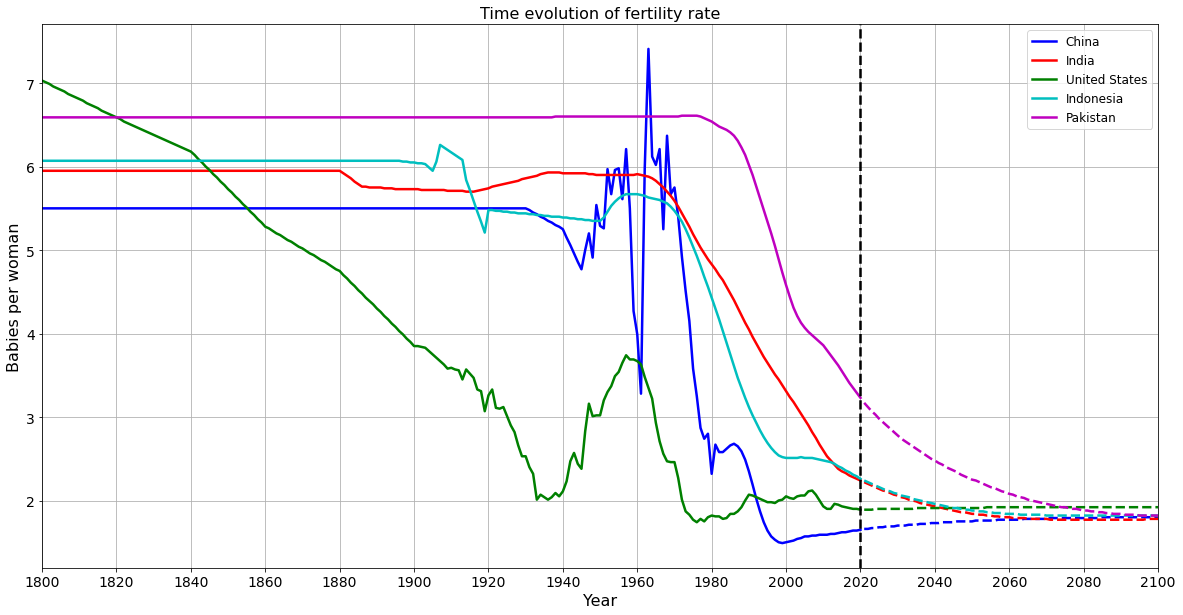

In [8]:
# Create line plots of fertility rate vs. year for the top 5 countries with the largest population sizes.

fig, ax = plt.subplots(figsize=(20,10))
plt.grid(True)
plt.title('Time evolution of fertility rate', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Babies per woman', fontsize=16)

year = range(1800,2101)

# Plot past-present data in solid lines, and forecasted data in dashed lines.

plt.plot(year[:year.index(2020)+1], fert_rate.loc['China',:'2020'], 'b-', linewidth=2.5, label='China')
plt.plot(year[year.index(2020)+1::], fert_rate.loc['China','2021'::], 'b--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], fert_rate.loc['India',:'2020'], 'r-', linewidth=2.5, label='India')
plt.plot(year[year.index(2020)+1::], fert_rate.loc['India','2021'::], 'r--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], fert_rate.loc['United States',:'2020'], 'g-', linewidth=2.5, label='United States')
plt.plot(year[year.index(2020)+1::], fert_rate.loc['United States','2021'::], 'g--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], fert_rate.loc['Indonesia',:'2020'], 'c-', linewidth=2.5, label='Indonesia')
plt.plot(year[year.index(2020)+1::], fert_rate.loc['Indonesia','2021'::], 'c--', linewidth=2.5)
plt.plot(year[:year.index(2020)+1], fert_rate.loc['Pakistan',:'2020'], 'm-', linewidth=2.5, label='Pakistan')
plt.plot(year[year.index(2020)+1::], fert_rate.loc['Pakistan','2021'::], 'm--', linewidth=2.5)
plt.axvline(x=2020, color='k', linestyle='--', linewidth=2.5)

plt.xlim(min(year),max(year))
ax.set_xticks(range(min(year),max(year)+1, 20))
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Let's now look at the relationship between fertility rate and life expectancy. If the fertility rate has been decreasing, but the life expectancy has been increasing at the same time, then that could explain the increase in population size and its eventual saturation. 

In [9]:
# Path of the life expectancy file to read.
filepath_4 = '/kaggle/input/life-expectancy/life_expectancy_years.csv'

# Read the file into a data variable.
life_expec = pd.read_csv(filepath_4, index_col='country')

life_expec.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


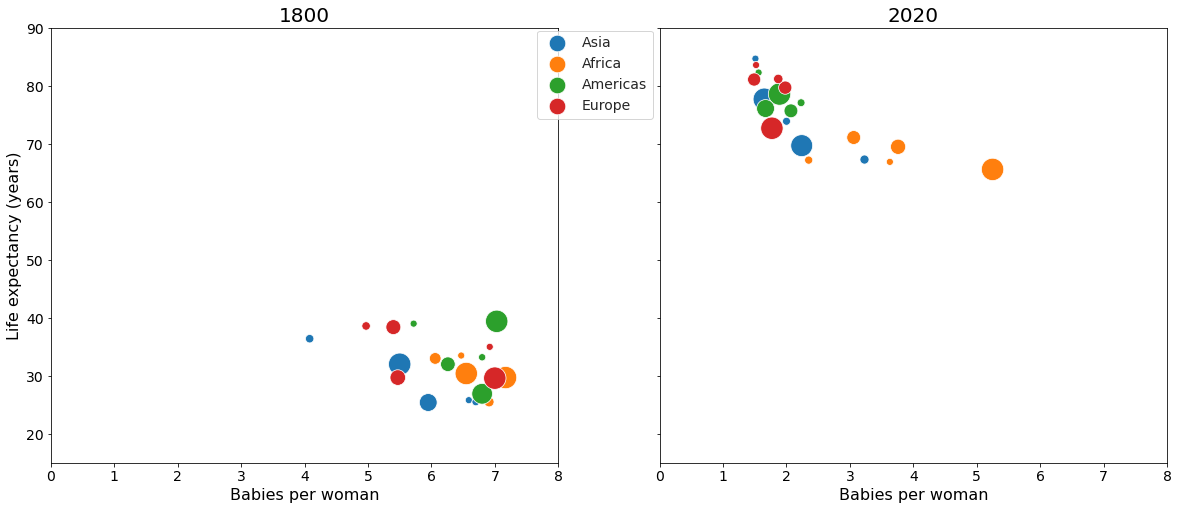

In [10]:
# Create a scatter plot of life expectancy vs. fertility rate with the bubble size representing the population size.

# Pick a set of countries to represent various world regions.
Asia = ['India', 'China', 'Pakistan', 'Japan', 'Bangladesh']
Africa = ['Nigeria', 'Egypt', 'South Africa', 'Ethiopia', 'Kenya']
Americas = ['United States','Canada', 'Brazil', 'Mexico', 'Argentina']
Europe = ['Russia', 'Germany', 'Turkey', 'Italy', 'United Kingdom']

regions = [Asia, Africa, Americas, Europe]
times =['1800','2020']

fig, (ax1, ax2) = plt.subplots(1, 2, num=1, figsize=(20,8) ,sharex='all', sharey='all')
sns.set_style('whitegrid')

for region in regions:
    for time in times:
        if time == times[0]: ax = ax1
        else: ax = ax2
        sns.scatterplot(x=fert_rate.loc[region, time], y=life_expec.loc[region, time], size=data_time.loc[region,time],
                       sizes=(50,500), legend=False, ax=ax)
        
ax1.set_title(times[0], fontsize=20)
ax2.set_title(times[1], fontsize=20)

ax1.set_xlim([0, 8])
ax1.set_ylim([15, 90])

ax1.set_xlabel('Babies per woman', fontsize=16)
ax1.set_ylabel('Life expectancy (years)', fontsize=16)
ax2.set_xlabel('Babies per woman', fontsize=16)

plt.legend(['Asia','Africa','Americas','Europe'], bbox_to_anchor=(0, 1.01), loc='upper right', fontsize=14)

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

As you can see from the two plots above, life expectancy has increased, while number of babies per woman has decreased for most countries. In the past, there were more births, but not many babies made it adulthood. Since life expectancy has increased over the years, families no longer needed to have as many babies. During this transition period from many babies to less babies, there was a period during which families were still having lots of babies, most of whom survived. This caused the eventual increase of the world population. Since the number of births has saturated now around 2 babies per woman, it is expected that this population increase will also saturate.

It is interesting to see if there is any correlation between family income and number of babies. Intuitively, we expect that as family income increases, they tend to have less babies. Income dataset was obtained again from [Gapminder](http://gapm.io/dgdppc). It reports the inflation-adjusted GDP per person for world countries.

In [11]:
# Path of the income per person file to read.
filepath_5 = '/kaggle/input/income-per-person/income_per_person_gdppercapita_ppp_inflation_adjusted.csv'

# Read the file into a data variable.
income = pd.read_csv(filepath_5, index_col='country')

income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
Algeria,715,716,717,718,719,720,721,722,723,724,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
Angola,618,620,623,626,628,631,634,637,640,642,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


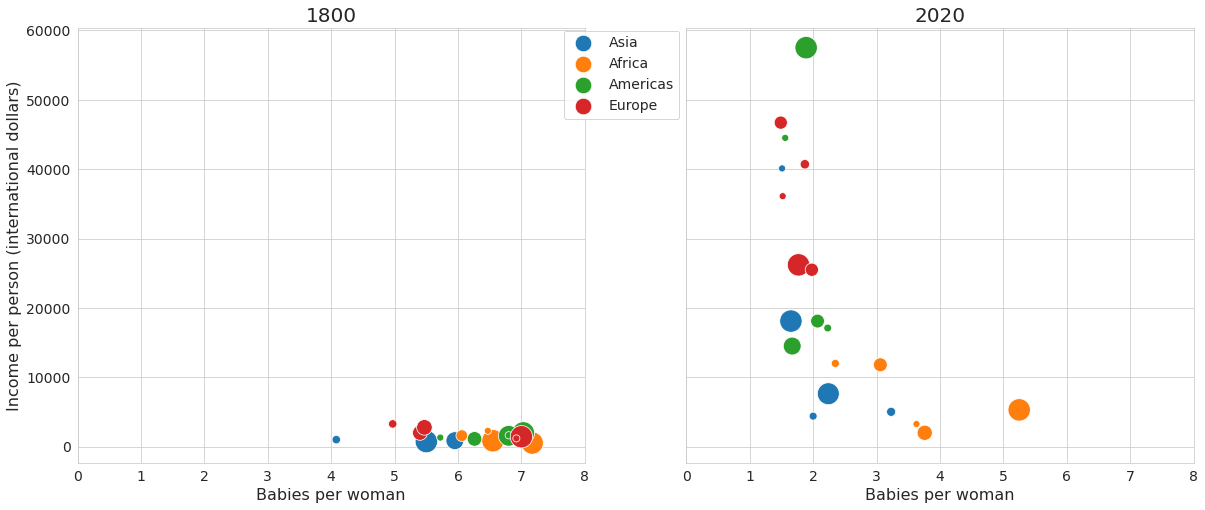

In [12]:
# Create a scatter plot of Income vs. fertility rate with the bubble size representing the population size.

# Plot it for the same regions and times as above.

fig, (ax1, ax2) = plt.subplots(1, 2, num=1, figsize=(20,8) ,sharex='all', sharey='all')
sns.set_style('whitegrid')

for region in regions:
    for time in times:
        if time == times[0]: ax = ax1
        else: ax = ax2
        sns.scatterplot(x=fert_rate.loc[region, time], y=income.loc[region, time], size=data_time.loc[region,time],
                       sizes=(50,500), legend=False, ax=ax)
        
ax1.set_title(times[0], fontsize=20)
ax2.set_title(times[1], fontsize=20)

ax1.set_xlim([0, 8])

ax1.set_xlabel('Babies per woman', fontsize=16)
ax1.set_ylabel('Income per person (international dollars)', fontsize=16)
ax2.set_xlabel('Babies per woman', fontsize=16)

plt.legend(['Asia','Africa','Americas','Europe'], bbox_to_anchor=(0, 1.01), loc='upper right', fontsize=14)

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

As expected, with the exception of some African countries, as people got richer with time, they started having less babies. This is because with increased wealth comes better access to education and health care, which prompts families to have fewer babies. 